In [15]:
# ================================
# Decision Tree for Credit Scoring
# ================================

# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [4]:
# 2. Load dataset
data = pd.read_csv("UCI_Credit_Card.csv")  # <-- replace with your dataset path
print(data.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [5]:
# 3. Feature-target split
X = data.drop("default.payment.next.month", axis=1)
y = data["default.payment.next.month"]


In [6]:
# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [7]:
# 5. Handle infinities and missing values
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())


In [8]:
# 6. Train Decision Tree Model
dt_model = DecisionTreeClassifier(
    criterion="gini",       # can also try "entropy"
    max_depth=6,            # limit depth to avoid overfitting
    random_state=42,
    class_weight="balanced" # handle class imbalance
)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=42)

In [9]:
# 7. Predictions
y_pred = dt_model.predict(X_test)
y_pred_prob = dt_model.predict_proba(X_test)[:, 1]


In [12]:
# 8. Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", auc)


Confusion Matrix:
[[3920  753]
 [ 596  731]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4673
           1       0.49      0.55      0.52      1327

    accuracy                           0.78      6000
   macro avg       0.68      0.69      0.69      6000
weighted avg       0.78      0.78      0.78      6000

ROC-AUC Score: 0.7601537702116294


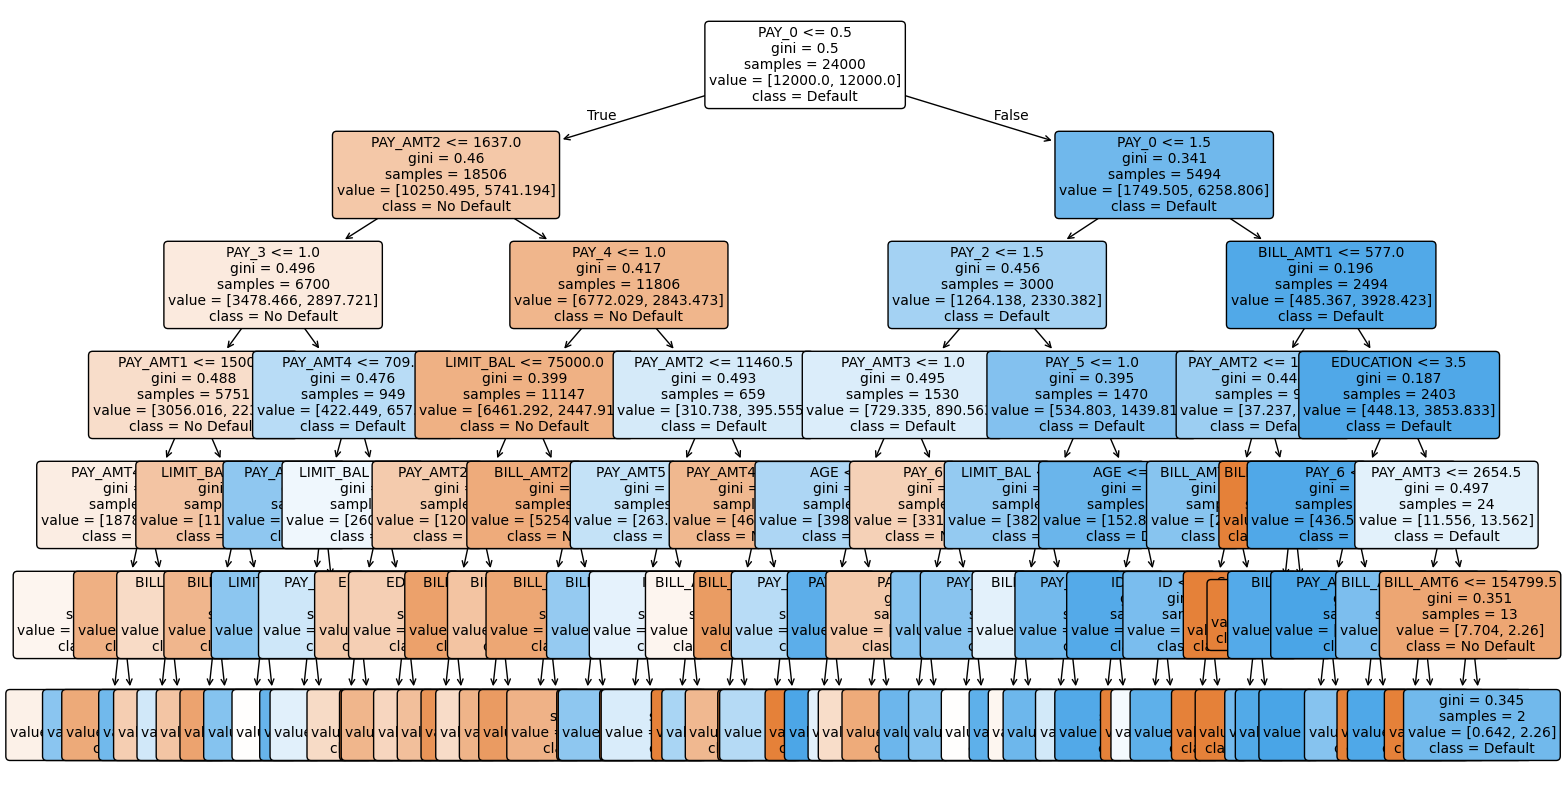

In [16]:
# 9. Visualization of Decision Tree
plt.figure(figsize=(18, 10))
plot_tree(
    dt_model,
    filled=True,
    feature_names=X.columns,
    class_names=["No Default", "Default"],
    rounded=True,
    fontsize=10
)
plt.show()